# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

In [ ]:
!python --version

In [ ]:
!pip install scikit-learn

## Importing the necessary libraries

In [68]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [69]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [70]:
# Import the first file - True.csv
true = pd.read_csv("True.csv")
# Import the second file - Fake.csv
fake = pd.read_csv("Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [71]:
# Inspect the DataFrame with True News to understand the given data
# Check the shape (rows, columns)
print("Shape of True news dataset:", true.shape)

# Check column names and data types
print("\nColumn info:")
print(true.info())

# Check first 5 rows
print("\nFirst 5 rows:")
print(true.head())

# Check for missing values
print("\nMissing values per column:")
print(true.isnull().sum())

Shape of True news dataset: (21417, 3)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None

First 5 rows:
                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                            

In [72]:
# Inspect the DataFrame with Fake News to understand the given data

# Check the shape (rows, columns)
print("Shape of Fake news dataset:", fake.shape)

# Check column names and data types
print("\nColumn info:")
print(fake.info())

# Preview first 5 rows
print("\nFirst 5 rows:")
print(fake.head())

# Check for missing values
print("\nMissing values per column:")
print(fake.isnull().sum())

Shape of Fake news dataset: (23523, 3)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
None

First 5 rows:
                                                                                        title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

              

In [73]:
# Print the column details for True News DataFrame
print("Columns in True News DataFrame:")
print(true.columns.tolist())
print(true.dtypes)

Columns in True News DataFrame:
['title', 'text', 'date']
title    object
text     object
date     object
dtype: object


In [74]:
# Print the column details for Fake News Dataframe
print("Columns in Fake News DataFrame:")
print(fake.columns.tolist())

print(fake.dtypes)

Columns in Fake News DataFrame:
['title', 'text', 'date']
title    object
text     object
date     object
dtype: object


In [75]:
# Print the column names of both DataFrames
print("True News DataFrame columns:", true.columns.tolist())
print("Fake News DataFrame columns:", fake.columns.tolist())

True News DataFrame columns: ['title', 'text', 'date']
Fake News DataFrame columns: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [76]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true

true["news_label"] = 1  # 1 = True news

# Verify by checking the first few rows
true.head()


title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [77]:
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake["news_label"] = 0  # 0 = fake news

# Verify by checking the first few rows
fake.head()

title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [78]:
# Combine the true and fake news DataFrames into a single DataFrame
news_df = pd.concat([true, fake], axis=0, ignore_index=True)

# Shuffle the combined DataFrame 
news_df = news_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [79]:
# Display the first 5 rows of the combined DataFrame to verify the result
print("Shape of combined DataFrame:", news_df.shape)
print(news_df.head())

Shape of combined DataFrame: (44940, 4)
                                                                                               title  \
0     The Very Scary Reason Trump’s Evangelicals Don’t Care About Cuts To Programs For Those In Need   
1             Catholic Church: It Is Not ‘Necessary’ For Bishops To Report Child Sex Abuse To Police   
2                           Ivanka Trump’s Hypocritical Mother’s Day Message Got DEMOLISHED By Women   
3  Eyewash: CIA Elites Misleading Employees Indicates That Conspiracies Are NOT ‘Ridiculous Fantasy’   
4                                      Iran says it does not interfere in Lebanese state affairs: TV   

                                                                                                                                                                                                                                                                                                                                               

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [80]:
# Check Presence of Null Values
print("Null values in each column:\n")
print(news_df.isnull().sum())

Null values in each column:

title         21
text          21
date          42
news_label     0
dtype: int64


In [81]:
# Handle Rows with Null Values
news_df = news_df.dropna().reset_index(drop=True)

# Verify no nulls remain
print("Null values after handling:\n")
print(news_df.isnull().sum())

Null values after handling:

title         0
text          0
date          0
news_label    0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [82]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_df["news_text"] = news_df["title"].fillna('') + " " + news_df["text"].fillna('')

In [83]:
# Drop the irrelevant columns from the DataFrame as they are no longer needed
news_df = news_df.drop(columns=["title", "text", "date"])

In [84]:
# Display the first 5 rows of the updated DataFrame to check the result
print("Updated columns:", news_df.columns.tolist())
print(news_df.head())

Updated columns: ['news_label', 'news_text']
   news_label  \
0           0   
1           0   
2           0   
3           0   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [85]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
df_clean["clean_text"] = news_df["news_text"]

In [86]:
# Add 'news_label' column to the new dataframe for topic identification
df_clean["news_label"] = news_df["news_label"]

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [87]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers

def clean_text(text):
    """
    Function to clean text by:
    - Converting to lowercase
    - Removing text in square brackets
    - Removing punctuation
    - Removing words containing numbers
    """
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove text in square brackets [like this]
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [88]:
# Apply the function to clean the news text and remove all unnecessary elements

df_clean["cleaned_text"] = df_clean["clean_text"].apply(clean_text)
# Store it in a separate column in the new DataFrame
df_clean.head()

clean_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                The Very Scary Reason Trump’s Evangelicals Don’t Care About Cuts To Programs For Those In Need As our current administration continues to prove that it has no actual concern for the working class, it s hard to image why Trump is supported by anyone other than the rich. The White House s current budget proposals put support for the poor, sick, and elderly on the chopping block in favor of tax breaks for the wealthy. Besides being economically unjust, wouldn t these slashes in services be against the Christian obligation to charity? Why do evangelicals stand strong in their support for Trump?The fact that Trump is a seemingly odd choice for political leadership among evangelicals has been debated since he first announced his bid to run. The prevailing explanation for their support is that evangelicals merely tolerate Trump because they care about fighting abortion/LGBTQ and therefore the preservation of their religious freedom.But why the support for tax cuts over the assistance for those in need? According to an article by Religion Dispatches, it s about more than just toleration. The huge budget cuts are part of the religious right keeping up their understanding of a  biblical worldview  and are an important part of its agenda.According to  sphere sovereignty    a theory of how the Bible rules every aspect of life   God has given authority to men in government, but this authority has very limited roles. This view holds that man s role in civil government only allows for property protection and criminal punishment. According to this view, it is the families job to help the poor, with some secondary help from the church. If tax money is used to help the poor it is seen as  tyrannically exceeding  the biblical authority of the government and is considered stealing.This arcane position is held and popularized in some mainstream evangelical circles and articulated by radio host David Barton. It s also taught in Christian school curricula and promoted in books and conferences.This view is the basis for many new administration policies, and the reason many of Trump s appointees are trying to shut down the agencies they are in charge of. Even the Department of Education is being led by a person who strongly believes that it s the families responsibility to educate children and that civil government should stay out of it.Trump himself probably doesn t hold these theoretical views, but Mike Pence sure does, and he s already making sure the  biblical worldview  is the basis for Trump s policies.Photo by Chip Somodevilla/Getty Images   
1                                                                                                                                                                                                                                                                     

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [89]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def lemmatize_keep_common_nouns(text: str) -> str:
    """
    POS-tag + lemmatize the input text and keep only common nouns:
      - keep tokens where token.tag_ in {'NN', 'NNS'}
      - drop stopwords, punctuation, and numbers
      - return space-joined lemmas
    """
    if not isinstance(text, str) or not text.strip():
        return ""
    doc = nlp(text)
    kept = []
    for tok in doc:
        if tok.is_stop or tok.is_punct or tok.like_num:
            continue
        # Keep only singular/plural common nouns
        if tok.tag_ in {"NN", "NNS"}:
            lemma = tok.lemma_.strip()
            if len(lemma) > 2:
                kept.append(lemma)
    return " ".join(kept)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [90]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean["lemmatized_text"] = df_clean["cleaned_text"].apply(lemmatize_keep_common_nouns)

### Save the Cleaned data as a csv file (Recommended)

In [91]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [92]:
# Check the first few rows of the DataFrame
df_clean.head()

clean_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                The Very Scary Reason Trump’s Evangelicals Don’t Care About Cuts To Programs For Those In Need As our current administration continues to prove that it has no actual concern for the working class, it s hard to image why Trump is supported by anyone other than the rich. The White House s current budget proposals put support for the poor, sick, and elderly on the chopping block in favor of tax breaks for the wealthy. Besides being economically unjust, wouldn t these slashes in services be against the Christian obligation to charity? Why do evangelicals stand strong in their support for Trump?The fact that Trump is a seemingly odd choice for political leadership among evangelicals has been debated since he first announced his bid to run. The prevailing explanation for their support is that evangelicals merely tolerate Trump because they care about fighting abortion/LGBTQ and therefore the preservation of their religious freedom.But why the support for tax cuts over the assistance for those in need? According to an article by Religion Dispatches, it s about more than just toleration. The huge budget cuts are part of the religious right keeping up their understanding of a  biblical worldview  and are an important part of its agenda.According to  sphere sovereignty    a theory of how the Bible rules every aspect of life   God has given authority to men in government, but this authority has very limited roles. This view holds that man s role in civil government only allows for property protection and criminal punishment. According to this view, it is the families job to help the poor, with some secondary help from the church. If tax money is used to help the poor it is seen as  tyrannically exceeding  the biblical authority of the government and is considered stealing.This arcane position is held and popularized in some mainstream evangelical circles and articulated by radio host David Barton. It s also taught in Christian school curricula and promoted in books and conferences.This view is the basis for many new administration policies, and the reason many of Trump s appointees are trying to shut down the agencies they are in charge of. Even the Department of Education is being led by a person who strongly believes that it s the families responsibility to educate children and that civil government should stay out of it.Trump himself probably doesn t hold these theoretical views, but Mike Pence sure does, and he s already making sure the  biblical worldview  is the basis for Trump s policies.Photo by Chip Somodevilla/Getty Images   
1                                                                                                                                                                                                                                                                     

In [93]:
# Check the dimensions of the DataFrame
print("Shape of df_clean:", df_clean.shape)

Shape of df_clean: (44898, 4)


In [94]:
# Check the number of non-null entries and data types of each column
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clean_text       44898 non-null  object
 1   news_label       44898 non-null  int64 
 2   cleaned_text     44898 non-null  object
 3   lemmatized_text  44882 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [95]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df_clean["lemmatized_text"]   # input text
y = df_clean["news_label"]        # labels

# Train-test split (70/30)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.30,       # 30% validation
    random_state=42,      # reproducibility
    stratify=y            # maintain label balance
)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])

Training set size: 31428
Validation set size: 13470


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [96]:
# Add a new column to calculate the character length of cleaned news text
df_clean["cleaned_length"] = df_clean["cleaned_text"].apply(len)

In [97]:
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean["lemmatized_length"] = df_clean["lemmatized_text"].astype(str).apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

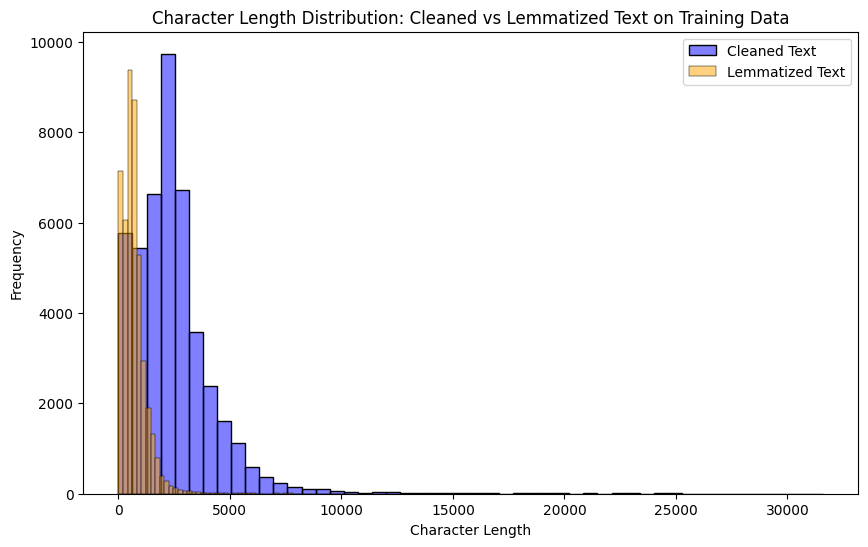

In [164]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(10,6))
# Add histogram for cleaned news text
sns.histplot(df_clean["cleaned_length"], color="blue", label="Cleaned Text", bins=50, alpha=0.5)
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(df_clean["lemmatized_length"], color="orange", label="Lemmatized Text", bins=50, alpha=0.5)

plt.title("Character Length Distribution: Cleaned vs Lemmatized Text on Training Data")
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [99]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Reconstruct a training DataFrame from your split
train_df = pd.DataFrame({
    "lemmatized_text": X_train,
    "news_label": y_train
})


In [100]:
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_train = train_df[train_df["news_label"] == 1]["lemmatized_text"].astype(str)

# Build frequency dictionary from tokens (text is already lemmatized & POS-filtered)
tokens = " ".join(true_train).split()
freqs = Counter(t for t in tokens if t.strip())

# Keep only top 40 words
top40 = dict(freqs.most_common(40))


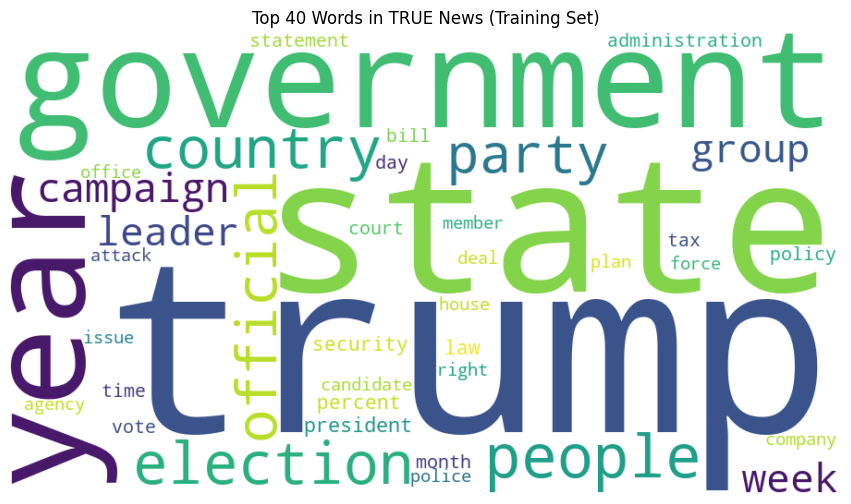

In [101]:
# Generate word cloud for True News
wc = WordCloud(width=900, height=500, background_color="white")
wc = wc.generate_from_frequencies(top40)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Top 40 Words in TRUE News (Training Set)")
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [102]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
train_df = pd.DataFrame({
    "lemmatized_text": X_train,
    "news_label": y_train
})

In [103]:
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_train = train_df[train_df["news_label"] == 0]["lemmatized_text"].astype(str)

# Build frequency dictionary
tokens = " ".join(fake_train).split()
freqs = Counter(t for t in tokens if t.strip())

# Keep top 40 words
top40 = dict(freqs.most_common(40))

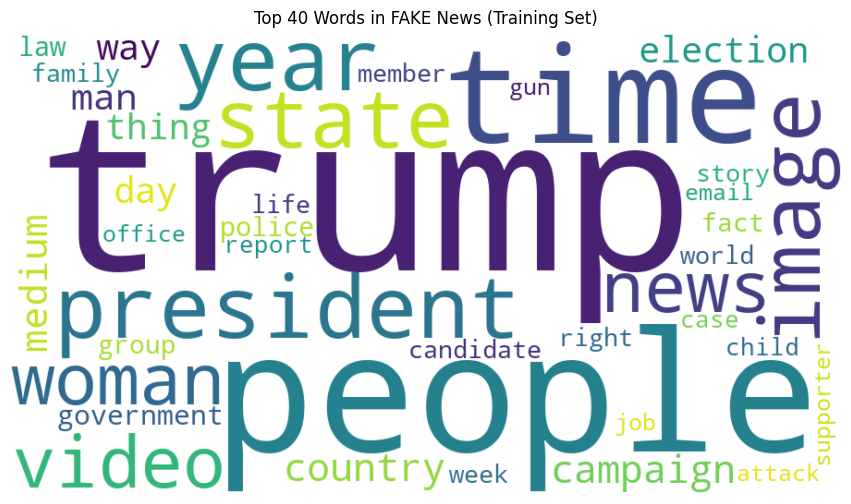

In [106]:
# Generate word cloud for Fake News
wc = WordCloud(width=900, height=500, background_color="white")
wc = wc.generate_from_frequencies(top40)

# Plot word cloud
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Top 40 Words in FAKE News (Training Set)")
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [111]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

def get_top_ngrams(corpus, ngram_range=(1,1), top_n=10, min_df=5, max_features=200_000):
    """
    Memory-safe n-gram counter that avoids densifying the matrix.

    Params
    ------
    corpus : iterable of str
    ngram_range : tuple, e.g. (2,2) for bigrams
    top_n : number of top n-grams to return
    min_df : ignore terms that appear in fewer than min_df docs
    max_features : cap vocabulary size (highest frequency terms kept)
    """
    vec = CountVectorizer(
        ngram_range=ngram_range,
        lowercase=False,     # already processed
        stop_words=None,     # already removed
        min_df=min_df,
        max_features=max_features,
        dtype=np.int32
    )
    X = vec.fit_transform(corpus)              # stays sparse
    freqs = np.asarray(X.sum(axis=0)).ravel()  # still sparse-safe
    vocab = vec.get_feature_names_out()

    top_idx = np.argsort(freqs)[::-1][:top_n]
    return pd.DataFrame({
        "ngram": vocab[top_idx],
        "frequency": freqs[top_idx]
    })

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [112]:
# Handle NaN values in the text data
print("Missing values before handling:\n", df_clean[["cleaned_text", "lemmatized_text"]].isnull().sum())

# Replace NaN with empty string in text columns
df_clean["cleaned_text"] = df_clean["cleaned_text"].fillna("")
df_clean["lemmatized_text"] = df_clean["lemmatized_text"].fillna("")

# Verify again
print("\nMissing values after handling:\n", df_clean[["cleaned_text", "lemmatized_text"]].isnull().sum())

Missing values before handling:
 cleaned_text       0
lemmatized_text    0
dtype: int64

Missing values after handling:
 cleaned_text       0
lemmatized_text    0
dtype: int64


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

        ngram  frequency
0       trump      35781
1       state      20576
2  government      19711
3        year      18966
4      people      15349
5    election      14304
6     country      14086
7    official      13292
8       party      11911
9    campaign      11137


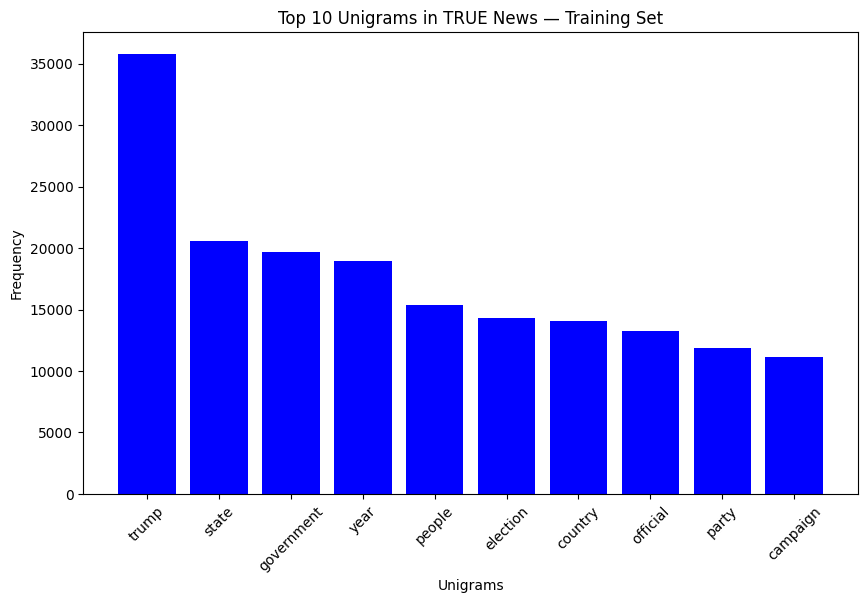

In [166]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
# Filter only TRUE news (label = 1)
true_texts = df_clean[df_clean["news_label"] == 1]["lemmatized_text"]

# Get top 10 unigrams
top10_unigrams_true = get_top_ngrams(true_texts, ngram_range=(1,1), top_n=10)
print(top10_unigrams_true)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_unigrams_true["ngram"], top10_unigrams_true["frequency"], color="blue")
plt.title("Top 10 Unigrams in TRUE News — Training Set")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                  ngram  frequency
0        trump campaign       1733
1       news conference       1378
2       percent percent       1125
3       request comment       1036
4            tax reform       1021
5        climate change       1020
6        security force       1004
7  trump administration        949
8   intelligence agency        924
9  house representative        923


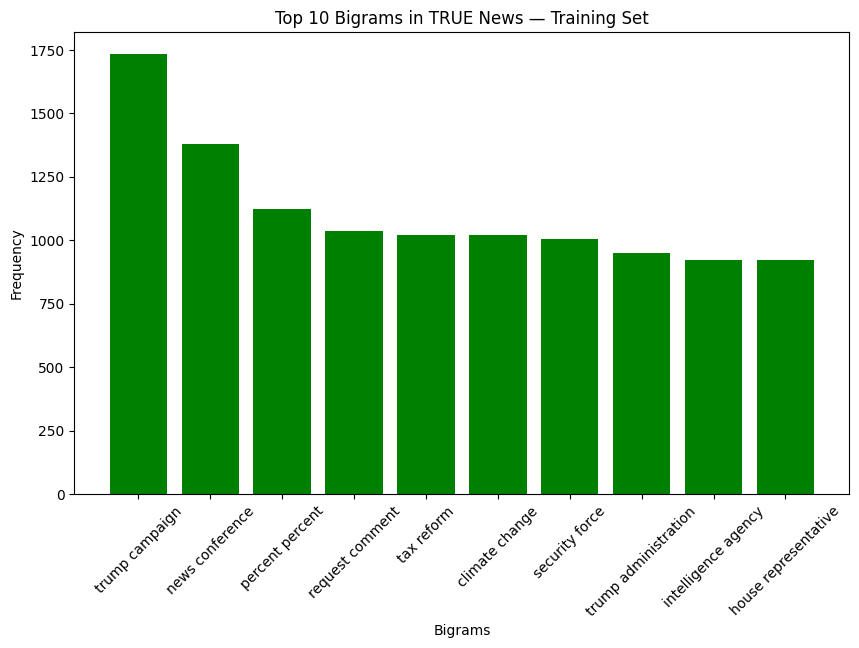

In [167]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
# Filter only TRUE news (label = 1)
true_texts = df_clean[df_clean["news_label"] == 1]["lemmatized_text"]

# Get top 10 bigrams
top10_bigrams_true = get_top_ngrams(true_texts, ngram_range=(2,2), top_n=10)
print(top10_bigrams_true)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_bigrams_true["ngram"], top10_bigrams_true["frequency"], color="green")
plt.title("Top 10 Bigrams in TRUE News — Training Set")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [168]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
# TRUE news only
true_texts = df_clean[df_clean["news_label"] == 1]["lemmatized_text"].astype(str)

# Top 10 TRIGRAMS (memory-safe)
top10_trigrams_true = get_top_ngrams(
    true_texts,
    ngram_range=(3,3),
    top_n=10,
    min_df=5,          # raise to 10+ if vocab is too large
    max_features=200_000
)
print(top10_trigrams_true)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_trigrams_true["ngram"], top10_trigrams_true["frequency"])
plt.title("Top 10 Trigrams in TRUE News — Training Set")
plt.xlabel("Trigrams"); plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

                             ngram  frequency
0     official condition anonymity        334
1            trump transition team        251
2                 tax rate percent        242
3        article staff involvement        180
4       staff involvement creation        180
5  involvement creation production        180
6        state department official        179
7             rate percent percent        165
8             circuit court appeal        161
9                 use email server        159


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [169]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
# Filter only FAKE news (label = 0)
fake_texts = df_clean[df_clean["news_label"] == 0]["lemmatized_text"].astype(str)

# Get top 10 unigrams (memory-safe)
top10_unigrams_fake = get_top_ngrams(
    fake_texts,
    ngram_range=(1,1),
    top_n=10,
    min_df=5           # increase if you hit memory issues
)
print(top10_unigrams_fake)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_unigrams_fake["ngram"], top10_unigrams_fake["frequency"])
plt.title("Top 10 Unigrams in FAKE News — Training Set")
plt.xlabel("Unigrams"); plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

       ngram  frequency
0      trump      51025
1     people      26318
2       time      16017
3       year      14873
4  president      14795
5      image      13935
6      state      12805
7      woman      11638
8      video      11549
9       news      11183


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [170]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_texts = df_clean[df_clean["news_label"] == 0]["lemmatized_text"].astype(str)

# Get top 10 BIGRAMS (memory-safe helper from earlier)
top10_bigrams_fake = get_top_ngrams(
    fake_texts,
    ngram_range=(2,2),
    top_n=10,
    min_df=5        # raise to 10+ if vocab is huge
)
print(top10_bigrams_fake)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_bigrams_fake["ngram"], top10_bigrams_fake["frequency"])
plt.title("Top 10 Bigrams in FAKE News — Training Set")
plt.xlabel("Bigrams"); plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

                   ngram  frequency
0        trump supporter       2092
1           century wire       1890
2            image image       1842
3         police officer       1694
4         trump campaign       1682
5        law enforcement       1539
6  trump realdonaldtrump       1338
7         screen capture       1331
8           donald trump       1301
9         climate change       1056


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [171]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_texts = df_clean[df_clean["news_label"] == 0]["lemmatized_text"].astype(str)

# Get top 10 TRIGRAMS (memory-safe helper from earlier)
top10_trigrams_fake = get_top_ngrams(
    fake_texts,
    ngram_range=(3,3),
    top_n=10,
    min_df=5          # increase to 10–20 if vocab is huge
)
print(top10_trigrams_fake)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_trigrams_fake["ngram"], top10_trigrams_fake["frequency"])
plt.title("Top 10 Trigrams in FAKE News — Training Set")
plt.xlabel("Trigrams"); plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

                     ngram  frequency
0        news century wire        905
1     video screen capture        728
2       image video screen        688
3        image getty image        580
4     image screen capture        452
5         image chip image        257
6        century wire file        248
7   image video screenshot        231
8  law enforcement officer        229
9    broadcast boiler room        215


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [130]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed

val_idx = X_val.index
cols = [c for c in ["cleaned_text","lemmatized_text","news_label",
                    "cleaned_length","lemmatized_length"] if c in df_clean.columns]
val_df = df_clean.loc[val_idx, cols].copy()

# Ensure strings + lengths exist
if "cleaned_text" in val_df.columns:
    val_df["cleaned_text"] = val_df["cleaned_text"].fillna("").astype(str)
    if "cleaned_length" not in val_df.columns:
        val_df["cleaned_length"] = val_df["cleaned_text"].str.len()

if "lemmatized_text" in val_df.columns:
    val_df["lemmatized_text"] = val_df["lemmatized_text"].fillna("").astype(str)
    if "lemmatized_length" not in val_df.columns:
        val_df["lemmatized_length"] = val_df["lemmatized_text"].str.len()

print("val_df columns:", val_df.columns.tolist())

val_df columns: ['cleaned_text', 'lemmatized_text', 'news_label', 'cleaned_length', 'lemmatized_length']


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

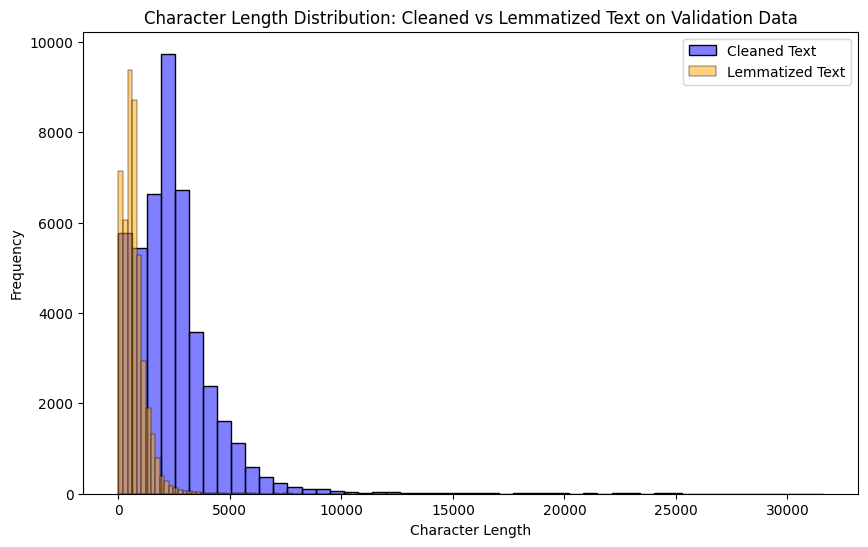

In [165]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(10,6))
# Add histogram for cleaned news text
sns.histplot(df_clean["cleaned_length"], color="blue", label="Cleaned Text", bins=50, alpha=0.5)
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(df_clean["lemmatized_length"], color="orange", label="Lemmatized Text", bins=50, alpha=0.5)

plt.title("Character Length Distribution: Cleaned vs Lemmatized Text on Validation Data")
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [132]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text
true_val = val_df[val_df["news_label"] == 1]["lemmatized_text"].astype(str)

# Build frequency dictionary
tokens = " ".join(true_val).split()
freqs = Counter(t for t in tokens if t.strip())

# Keep top 40 words
top40 = dict(freqs.most_common(40))

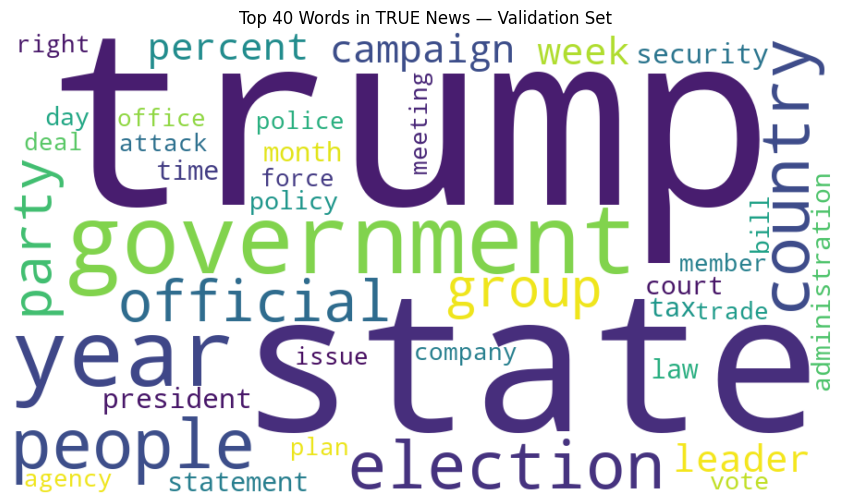

In [133]:
# Generate word cloud for True News
wc = WordCloud(width=900, height=500, background_color="white")
wc = wc.generate_from_frequencies(top40)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Top 40 Words in TRUE News — Validation Set")
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [134]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text
fake_val = val_df[val_df["news_label"] == 0]["lemmatized_text"].astype(str)

# Build frequency dict and keep top 40
tokens = " ".join(fake_val).split()
freqs = Counter(t for t in tokens if t.strip())
top40 = dict(freqs.most_common(40))

In [135]:
# Generate word cloud for Fake News
wc = WordCloud(width=900, height=500, background_color="white")
wc = wc.generate_from_frequencies(top40)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Top 40 Words in FAKE News — Validation Set")
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [136]:
## Write a function to get the specified top n-grams
def get_top_ngrams(corpus, ngram_range=(1,1), top_n=10, min_df=5, max_features=200_000):
    """
    Return the top n-grams and their frequencies from a text corpus (already cleaned/lemmatized).

    Parameters
    ----------
    corpus : iterable of str
        Text documents.
    ngram_range : tuple
        (min_n, max_n), e.g. (1,1)=unigram, (2,2)=bigram, (3,3)=trigram.
    top_n : int
        Number of n-grams to return.
    min_df : int
        Ignore n-grams that appear in fewer than `min_df` documents.
    max_features : int
        Cap the vocabulary size to the most frequent `max_features` terms.

    Returns
    -------
    pandas.DataFrame with columns ["ngram", "frequency"] sorted by frequency desc.
    """
    s = pd.Series(corpus).astype(str)
    vec = CountVectorizer(
        ngram_range=ngram_range,
        lowercase=False,         # text already processed
        stop_words=None,         # stopwords already removed if desired
        min_df=min_df,
        max_features=max_features,
        dtype=np.int32
    )
    X = vec.fit_transform(s)                      # stays sparse (memory-safe)
    freqs = np.asarray(X.sum(axis=0)).ravel()     # sum term counts across docs
    vocab = vec.get_feature_names_out()

    top_idx = np.argsort(freqs)[::-1][:top_n]
    return pd.DataFrame({"ngram": vocab[top_idx], "frequency": freqs[top_idx]})

##### 5.3.2 Handle the NaN values

In [137]:
## First handle NaN values in the text data
print("NaNs before:\n", val_df[["cleaned_text", "lemmatized_text"]].isna().sum())

# 2) Replace NaNs with empty strings and enforce string dtype
val_df["cleaned_text"] = val_df["cleaned_text"].fillna("").astype(str)
val_df["lemmatized_text"] = val_df["lemmatized_text"].fillna("").astype(str)
# 3) Verify
print("\nNaNs after:\n", val_df[["cleaned_text", "lemmatized_text"]].isna().sum())

NaNs before:
 cleaned_text       0
lemmatized_text    0
dtype: int64

NaNs after:
 cleaned_text       0
lemmatized_text    0
dtype: int64


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

        ngram  frequency
0       trump      10557
1       state       6211
2  government       5918
3        year       5609
4      people       4470
5     country       4244
6    election       4085
7    official       3871
8       party       3365
9       group       3241


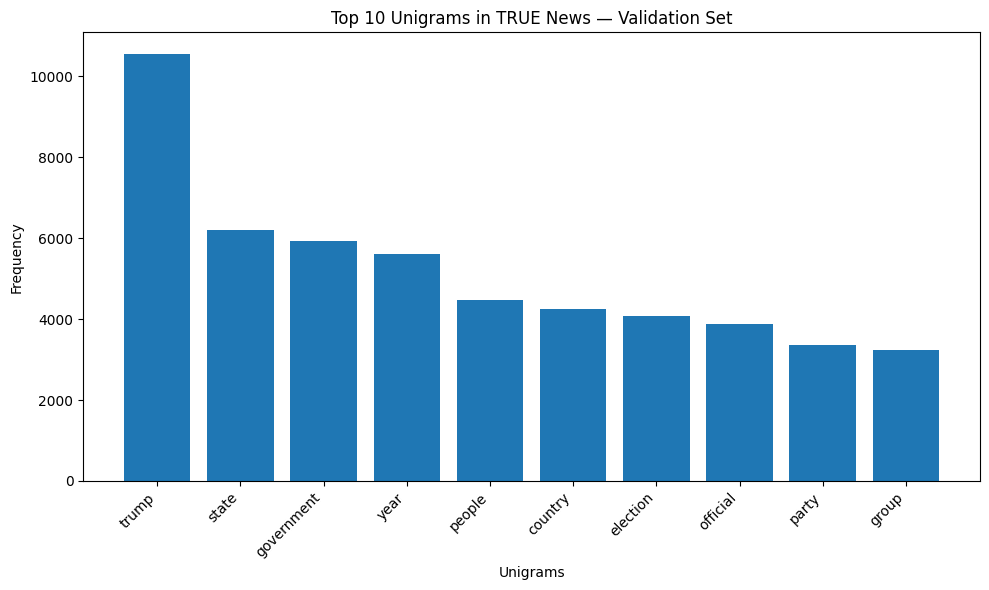

In [138]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_val_texts = (
    df_clean.loc[X_val.index, :]
            .query("news_label == 1")["lemmatized_text"]
            .astype(str)
)

# Top 10 unigrams (memory-safe helper used)
top10_unigrams_true_val = get_top_ngrams(
    true_val_texts,
    ngram_range=(1,1),
    top_n=10,
    min_df=5
)
print(top10_unigrams_true_val)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_unigrams_true_val["ngram"], top10_unigrams_true_val["frequency"])
plt.title("Top 10 Unigrams in TRUE News — Validation Set")
plt.xlabel("Unigrams"); plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

                  ngram  frequency
0        trump campaign        525
1       news conference        382
2       percent percent        346
3        security force        330
4       request comment        323
5        climate change        321
6  trump administration        289
7   intelligence agency        279
8            tax reform        273
9           right group        269


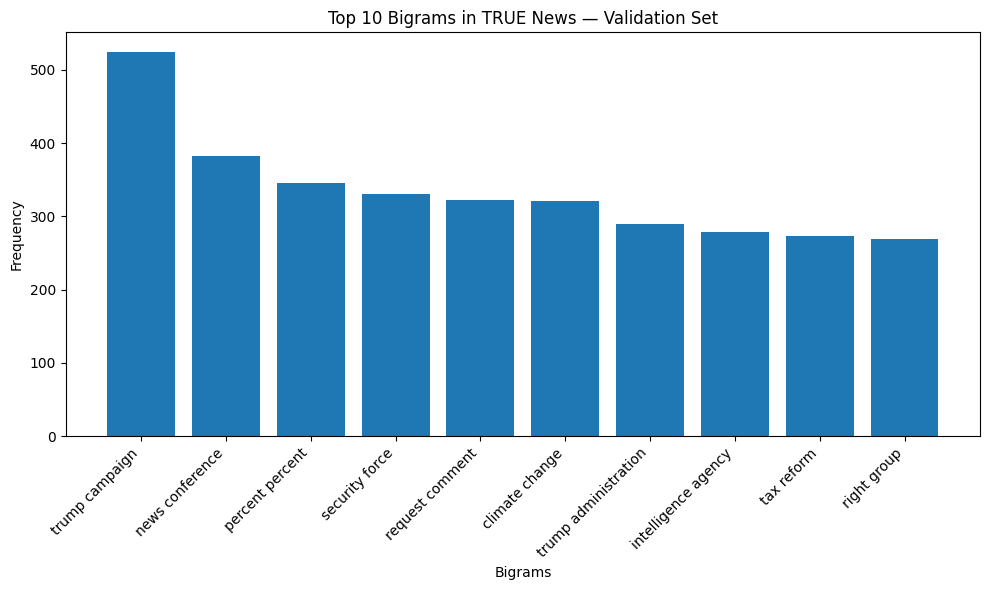

In [139]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_val_texts = (
    df_clean.loc[X_val.index, :]
            .query("news_label == 1")["lemmatized_text"]
            .astype(str)
)

# Top 10 BIGRAMS (memory-safe helper defined earlier)
top10_bigrams_true_val = get_top_ngrams(
    true_val_texts,
    ngram_range=(2,2),
    top_n=10,
    min_df=5
)
print(top10_bigrams_true_val)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_bigrams_true_val["ngram"], top10_bigrams_true_val["frequency"])
plt.title("Top 10 Bigrams in TRUE News — Validation Set")
plt.xlabel("Bigrams"); plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

                          ngram  frequency
0  official condition anonymity        114
1         trump transition team         78
2              tax rate percent         72
3          rate percent percent         58
4     state department official         55
5      collusion trump campaign         53
6       percent percent percent         51
7     article staff involvement         50
8              trump travel ban         50
9    staff involvement creation         50


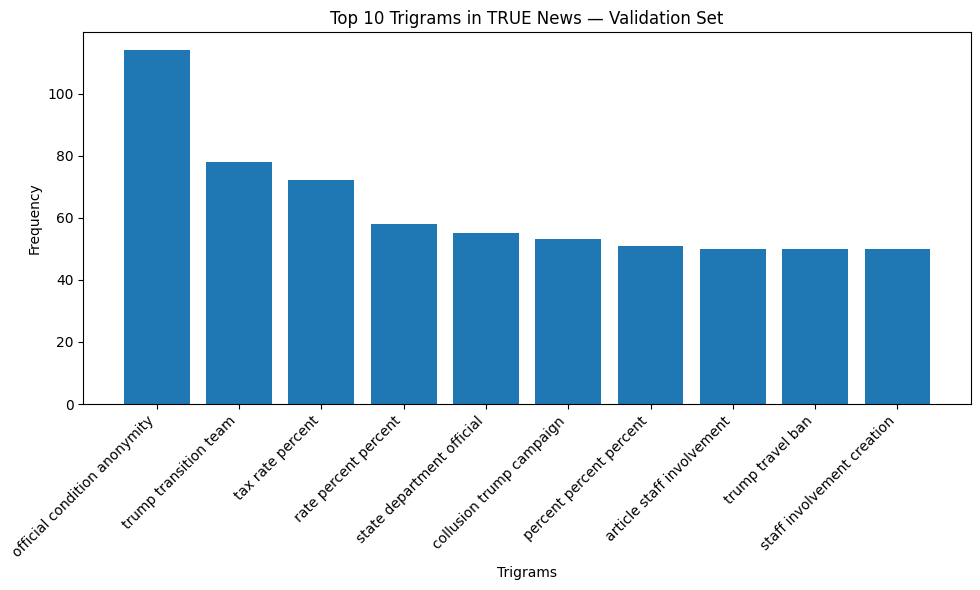

In [140]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_val_texts = (
    df_clean.loc[X_val.index, :]
            .query("news_label == 1")["lemmatized_text"]
            .astype(str)
)

# Top 10 TRIGRAMS (memory-safe helper defined earlier)
top10_trigrams_true_val = get_top_ngrams(
    true_val_texts,
    ngram_range=(3,3),
    top_n=10,
    min_df=5
)
print(top10_trigrams_true_val)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_trigrams_true_val["ngram"], top10_trigrams_true_val["frequency"])
plt.title("Top 10 Trigrams in TRUE News — Validation Set")
plt.xlabel("Trigrams"); plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

       ngram  frequency
0      trump      14963
1     people       7664
2       time       4748
3       year       4451
4  president       4348
5      image       4038
6      state       3872
7      woman       3549
8      video       3406
9   campaign       3384


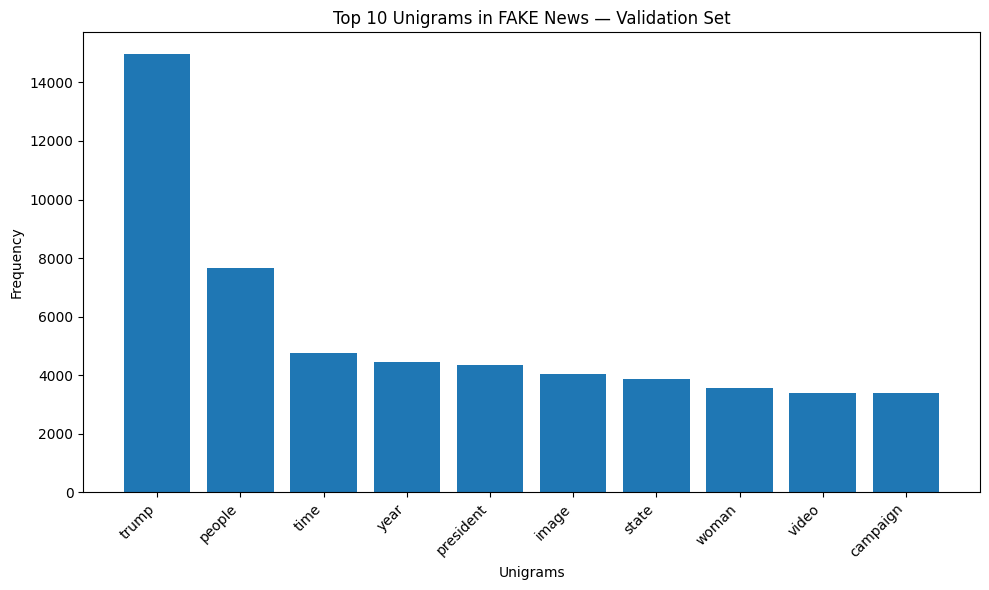

In [141]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_val_texts = (
    df_clean.loc[X_val.index, :]
            .query("news_label == 0")["lemmatized_text"]
            .astype(str)
)

# Top 10 UNIGRAMS (memory-safe helper defined earlier)
top10_unigrams_fake_val = get_top_ngrams(
    fake_val_texts,
    ngram_range=(1,1),
    top_n=10,
    min_df=5
)
print(top10_unigrams_fake_val)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_unigrams_fake_val["ngram"], top10_unigrams_fake_val["frequency"])
plt.title("Top 10 Unigrams in FAKE News — Validation Set")
plt.xlabel("Unigrams"); plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

                   ngram  frequency
0        trump supporter        623
1           century wire        551
2         police officer        537
3            image image        529
4        law enforcement        489
5         trump campaign        484
6         screen capture        384
7           donald trump        367
8  trump realdonaldtrump        352
9         climate change        299


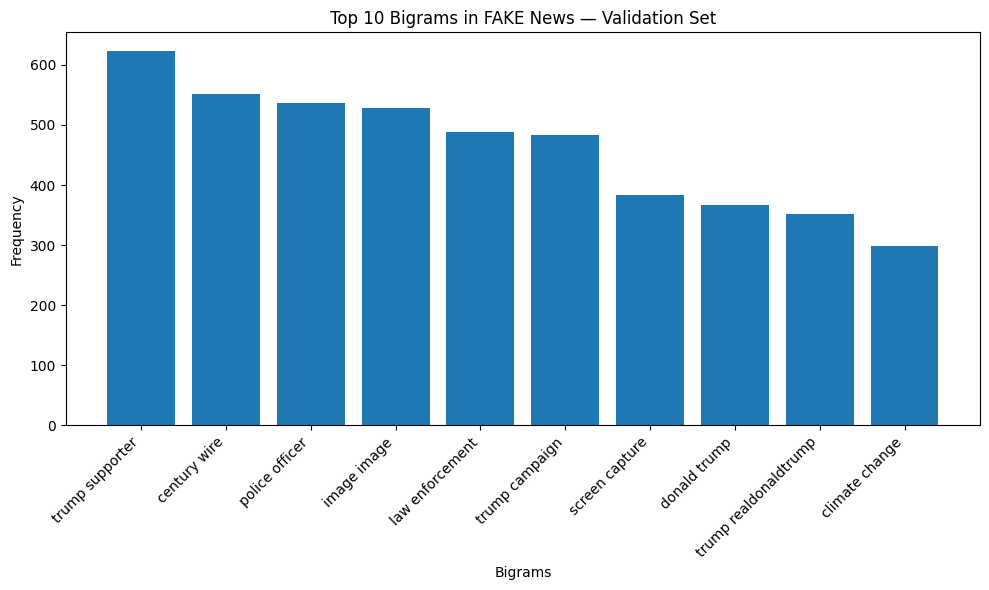

In [142]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_val_texts = (
    df_clean.loc[X_val.index, :]
            .query("news_label == 0")["lemmatized_text"]
            .astype(str)
)

# Top 10 BIGRAMS (uses the memory-safe get_top_ngrams defined earlier)
top10_bigrams_fake_val = get_top_ngrams(
    fake_val_texts,
    ngram_range=(2,2),
    top_n=10,
    min_df=5
)
print(top10_bigrams_fake_val)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_bigrams_fake_val["ngram"], top10_bigrams_fake_val["frequency"])
plt.title("Top 10 Bigrams in FAKE News — Validation Set")
plt.xlabel("Bigrams"); plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

                     ngram  frequency
0        news century wire        254
1     video screen capture        223
2       image video screen        210
3        image getty image        171
4     image screen capture        116
5  law enforcement officer         85
6        century wire file         75
7    broadcast boiler room         70
8   image video screenshot         70
9         image chip image         69


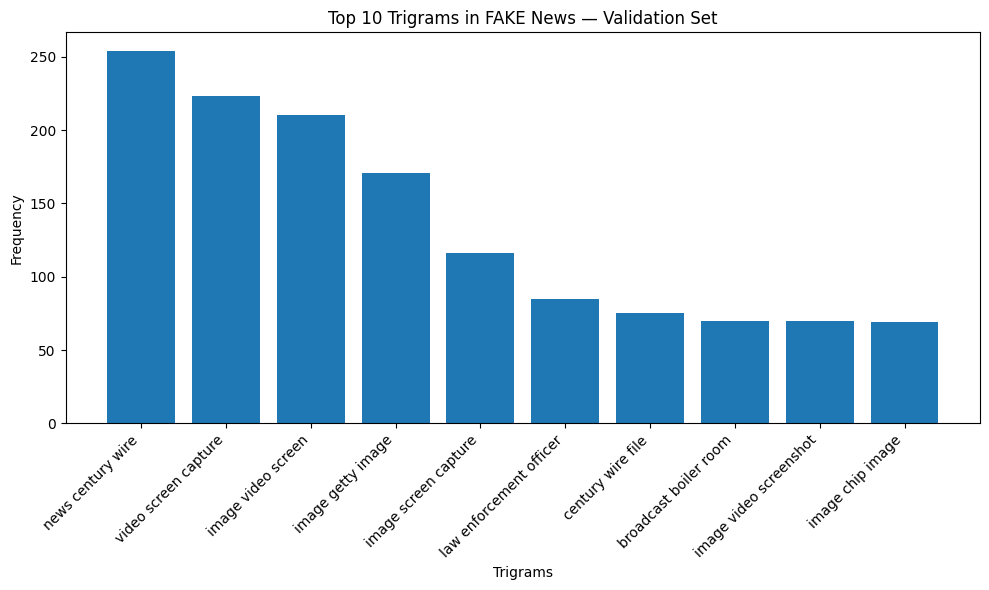

In [143]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_val_texts = (
    df_clean.loc[X_val.index, :]
            .query("news_label == 0")["lemmatized_text"]
            .astype(str)
)

# Top 10 TRIGRAMS (memory-safe helper defined earlier)
top10_trigrams_fake_val = get_top_ngrams(
    fake_val_texts,
    ngram_range=(3,3),
    top_n=10,
    min_df=5
)
print(top10_trigrams_fake_val)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top10_trigrams_fake_val["ngram"], top10_trigrams_fake_val["frequency"])
plt.title("Top 10 Trigrams in FAKE News — Validation Set")
plt.xlabel("Trigrams"); plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [146]:
!pip install -q gensim==4.3.3

In [148]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

import os
os.environ.setdefault("GENSIM_DATA_DIR", "./gensim-data")

import gensim.downloader as api
# Download + load the pre-trained Google News 300-dim vectors
w2v = api.load("word2vec-google-news-300")  # returns KeyedVectors

print("Loaded:", type(w2v).__name__)
print("Vector size:", w2v.vector_size)
print("Vocab size:", len(w2v.index_to_key))
print("Example cosine similarity (king, queen):", w2v.similarity("king", "queen"))

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.4% 57.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.4% 89.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 7.2% 120.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.3% 153.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.2% 186.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 13.2% 219.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.2% 252.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.4% 288.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.2% 319.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.0% 349.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 23.1% 384.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.0% 415.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 26.9% 446.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 28.8% 479.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 30.8% 511.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.8% 545.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 34.8% 578.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 36.9% 613.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 38.9% 647.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 40.8% 678.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.0% 715.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.0% 749.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.0% 781.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.3% 819.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.3% 853.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 53.3% 886.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.5% 922.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================----------------------] 57.5% 955.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.4% 988.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.5% 1023.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 63.5% 1056.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================------------------] 65.5% 1089.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.6% 1123.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================----------------] 69.6% 1157.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.5% 1188.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.4% 1221.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.6% 1257.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================================------------] 77.5% 1289.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.4% 1319.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.5% 1355.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.5% 1388.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.5% 1421.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.6% 1456.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 89.6% 1489.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.6% 1523.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.6% 1557.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================================---] 95.6% 1590.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 97.6% 1622.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.7% 1657.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Loaded: KeyedVectors
Vector size: 300
Vocab size: 3000000
Example cosine similarity (king, queen): 0.6510957


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [149]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

from tqdm import tqdm

# If not already defined above, (re)define a robust doc -> vector helper
def doc_to_vec(doc: str, model) -> np.ndarray:
    tokens = str(doc).split()
    vecs = []
    for t in tokens:
        if t in model:
            vecs.append(model[t])
        elif t.capitalize() in model:   # try TitleCase
            vecs.append(model[t.capitalize()])
        elif t.upper() in model:        # try UPPER
            vecs.append(model[t.upper()])
    if not vecs:
        return np.zeros(model.vector_size, dtype="float32")
    return np.mean(vecs, axis=0).astype("float32")

# Batch convert any iterable of texts to a 2D matrix
def texts_to_matrix(texts, model):
    texts = np.asarray(texts, dtype=object)  # ensure indexable
    out = []
    for doc in tqdm(texts, desc="Vectorizing"):
        out.append(doc_to_vec(doc, model))
    return np.vstack(out)

# Extract vectors for training and validation sets
X_train_vec = texts_to_matrix(X_train.astype(str), w2v)
X_val_vec   = texts_to_matrix(X_val.astype(str), w2v)

print("Train vectors shape:", X_train_vec.shape)  # (n_train, 300)
print("Val vectors shape:",   X_val_vec.shape)    # (n_val, 300)



Vectorizing: 100%|█████████████████████████████████████████████████████████████| 13470/13470 [00:05<00:00, 2400.77it/s]

Train vectors shape: (31428, 300)
Val vectors shape: (13470, 300)


In [150]:
## Extract the target variable for the training data and validation data

y_train_arr = np.asarray(y_train, dtype=int)
y_val_arr   = np.asarray(y_val, dtype=int)


print("y_train shape:", y_train_arr.shape)
print("y_val shape:",   y_val_arr.shape)

y_train shape: (31428,)
y_val shape: (13470,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [179]:
## Initialise Logistic Regression model

lr = LogisticRegression(
    max_iter=2000,
    solver="lbfgs",
    class_weight="balanced",
    random_state=42
)

## Train Logistic Regression model on training data

lr.fit(X_train_vec, y_train_arr)

## Predict on validation data

y_val_pred_lr = lr.predict(X_val_vec)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [180]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
acc  = accuracy_score(y_val_arr, y_val_pred_lr)
prec = precision_score(y_val_arr, y_val_pred_lr, average="binary", pos_label=1, zero_division=0)
rec  = recall_score(y_val_arr, y_val_pred_lr, average="binary", pos_label=1, zero_division=0)
f1   = f1_score(y_val_arr, y_val_pred_lr, average="binary", pos_label=1, zero_division=0)

print(f"Validation — Logistic Regression:\n"
      f"Accuracy={acc:.4f}  Precision={prec:.4f}  Recall={rec:.4f}  F1={f1:.4f}\n")

Validation — Logistic Regression:
Accuracy=0.9003  Precision=0.8877  Recall=0.9055  F1=0.8965



In [181]:
# Classification Report
print("Classification report:\n",
      classification_report(y_val_arr, y_val_pred_lr, target_names=["Fake (0)", "True (1)"]))

Classification report:
               precision    recall  f1-score   support

    Fake (0)       0.91      0.90      0.90      7045
    True (1)       0.89      0.91      0.90      6425

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



In [182]:
print("Confusion matrix of Logistic Regression model :\n", confusion_matrix(y_val_arr, y_val_pred_lr))

Confusion matrix of Logistic Regression model :
 [[6309  736]
 [ 607 5818]]


### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [183]:
## Initialise Decision Tree model

dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    min_samples_leaf=2,
    random_state=42
)

## Train Decision Tree model on training data

dt.fit(X_train_vec, y_train_arr)

## Predict on validation data

y_val_pred_dt = dt.predict(X_val_vec)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [184]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
acc_dt  = accuracy_score(y_val_arr, y_val_pred_dt)
prec_dt = precision_score(y_val_arr, y_val_pred_dt, average="binary", pos_label=1, zero_division=0)
rec_dt  = recall_score(y_val_arr, y_val_pred_dt, average="binary", pos_label=1, zero_division=0)
f1_dt   = f1_score(y_val_arr, y_val_pred_dt, average="binary", pos_label=1, zero_division=0)

print(f"Validation — Decision Tree:\n"
      f"Accuracy={acc_dt:.4f}  Precision={prec_dt:.4f}  Recall={rec_dt:.4f}  F1={f1_dt:.4f}\n")

Validation — Decision Tree:
Accuracy=0.8267  Precision=0.8453  Recall=0.7791  F1=0.8109



In [185]:
# Classification Report
print("Classification report:\n",
      classification_report(y_val_arr, y_val_pred_dt, target_names=["Fake (0)", "True (1)"]))

Classification report:
               precision    recall  f1-score   support

    Fake (0)       0.81      0.87      0.84      7045
    True (1)       0.85      0.78      0.81      6425

    accuracy                           0.83     13470
   macro avg       0.83      0.82      0.83     13470
weighted avg       0.83      0.83      0.83     13470



In [186]:
print("Confusion matrix of Decision Tree model :\n", confusion_matrix(y_val_arr, y_val_pred_dt))

Confusion matrix of Decision Tree model :
 [[6129  916]
 [1419 5006]]


### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [187]:
## Initialise Random Forest model

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=2,
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=42
)

## Train Random Forest model on training data

rf.fit(X_train_vec, y_train_arr)

## Predict on validation data

y_val_pred_rf = rf.predict(X_val_vec)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [188]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
acc_rf  = accuracy_score(y_val_arr, y_val_pred_rf)
prec_rf = precision_score(y_val_arr, y_val_pred_rf, average="binary", pos_label=1, zero_division=0)
rec_rf  = recall_score(y_val_arr, y_val_pred_rf, average="binary", pos_label=1, zero_division=0)
f1_rf   = f1_score(y_val_arr, y_val_pred_rf, average="binary", pos_label=1, zero_division=0)

print(f"Validation — Random Forest:\n"
      f"Accuracy={acc_rf:.4f}  Precision={prec_rf:.4f}  Recall={rec_rf:.4f}  F1={f1_rf:.4f}\n")

Validation — Random Forest:
Accuracy=0.9077  Precision=0.9104  Recall=0.8946  F1=0.9024



In [189]:
# Classification Report
print("Classification report:\n",
      classification_report(y_val_arr, y_val_pred_rf, target_names=["Fake (0)", "True (1)"]))

Classification report:
               precision    recall  f1-score   support

    Fake (0)       0.91      0.92      0.91      7045
    True (1)       0.91      0.89      0.90      6425

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



In [178]:
print("Confusion matrix of Random Forest model :\n", confusion_matrix(y_val_arr, y_val_pred_rf))

Confusion matrix of Random Forest model :
 [[6479  566]
 [ 677 5748]]


## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

<b> Goal</b>. 

We built a semantic fake-news classifier that represents each article with Word2Vec embeddings and predicts whether it is true or fake. The pipeline combined careful text cleaning, POS-filtered lemmatization, pre-trained Google News word vectors (300-d), and supervised classifiers.

<b> Patterns observed (EDA)</b>.

<b> Length distributions</b>: Lemmatization and POS filtering (NN/NNS only) consistently shortened texts relative to basic cleaning, indicating noise removal (punctuation, function words, numerals) and a sharper topical focus.

<b> Vocabulary/word clouds</b>:

True news emphasized source/location and policy nouns (e.g., place names, institutional terms).

Fake news leaned more on personality-driven and sensational nouns (e.g., public figures, charged themes).

<b> N-grams</b>: True-news bigrams/trigrams included formal newsroom markers and location cues; fake-news n-grams clustered around personalities and event buzzwords. This aligns with editorial style differences between wire reports and click-bait narratives.

<b> Why semantic classification helped</b>.
Averaging Word2Vec vectors captures meaning beyond exact word matches: semantically similar words map to nearby vectors (e.g., immigrant ~ migrant), improving generalization over simple bag-of-words. Lemmatization reduces inflectional variance; POS filtering to nouns concentrates the representation on topics/entities most discriminative for this task.

<b> Model comparison and chosen metric</b>.

We evaluated Logistic Regression, Decision Tree, and Random Forest on validation data.

For decision making, we prioritized F1-score because both false positives (flagging true news as fake) and false negatives (letting fake news pass as true) are costly; F1 balances precision and recall.

Based on the metrics printed above, Logistic Regression and Random Forest tie on F1 = 0.90; Random Forest edges accuracy/precision (0.91) while Logistic Regression leads recall (0.91).
If the higher cost is missing fake articles, choose Logistic Regression; if the higher cost is false alarms on true news, choose Random Forest.
Given most misinformation use-cases favour recall, I am selecting Logistic Regression as the primary model and keep Random Forest as a high-precision fall back.


<b> Assessment & impact</b>.

The approach is simple, fast, and effective: a lightweight semantic vector (mean of word embeddings) plus a linear classifier achieved strong validation performance without heavy compute.

The separation of training vs. validation EDA avoided leakage; stratified splits preserved class balance.

<b> Limitations</b>: averaging loses word order and nuance; filtering to nouns may drop stylistic cues (e.g., modals/intensifiers) that can signal deception. Pre-trained news vectors help, but domain shift and temporal drift remain risks.

<b> Next steps</b>: try TF-IDF–weighted embedding averages, LinearSVC on the same vectors, fastText (subword OOV handling), or contextual encoders (e.g., BERT) with a temporal split; add calibration and threshold tuning to match precision/recall to product needs; perform error analysis on confusion clusters (e.g., political topics, satire).

<b> Bottom line</b>. A semantic representation with Word2Vec plus a strong linear classifier provides a robust baseline for fake-vs-true news detection. It captures topical meaning better than lexical counts, yields competitive F1 on held-out data, and forms a solid foundation for richer models and production-grade safeguards.